## Mount the drive to this notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Important libraries

In [ ]:
import numpy as np # linear algebr
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# use for model saving
import pickle

#ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# preprocessing on tweets
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
# For Extracting only the alphabetic data
import re

from nltk.tokenize import RegexpTokenizer
# from wordcloud import WordCloud

# For the plotting of the metrics
import matplotlib.pyplot as plt
import seaborn as sns

# For the Machine Learning Model Implementation
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.preprocessing import LabelEncoder

#split the data into training and testing
from sklearn.model_selection import train_test_split

# Vectorizing the Data into  numeric format
from sklearn.feature_extraction.text import TfidfVectorizer
# For the model Evaluations
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, f1_score, recall_score

from tabulate import tabulate  # dataframe to table
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Reading the dataset

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/thesis code/Suicide_Detection.csv")
df_train.columns = ['id',"text","label"]
df_train=df_train[["text","label"]]
# Show the first 5 rows of the dataframe.
print('....Training data....\n')
display(df_train)

....Training data....



,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


## Convert the labels from string to integer

In [ ]:
le = LabelEncoder()
labels=le.fit_transform(df_train.label)
df_train.label=labels
df_train

,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


## Information about data

In [ ]:
# information about the data set like columns , null values , datatype ,range index, memory
print('\n...........information of training data............\n')
print(df_train.info())


...........information of training data............

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   label   232074 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ MB
None


## Checking for null in dataset

In [ ]:
print("\n...Training.....\n")
print(df_train.isna().sum())


...Training.....

text     0
label    0
dtype: int64


## plot the class **distribution**


...Training.....

1    116037
0    116037
Name: label, dtype: int64


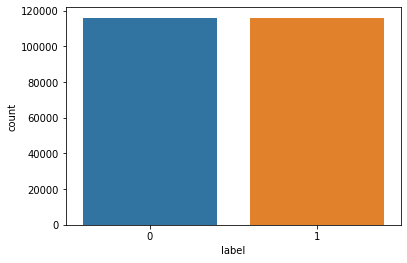

In [ ]:
# show the number of labels in dataset per class in visualize in bar graph
print("\n...Training.....\n")
print(df_train['label'].value_counts())

sns.countplot(data=df_train,x='label')


## **Preprocessing**

In [ ]:
dataset=df_train
dataset

,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


## Convert  the text in to small letter

In [ ]:
# checkeing the each tweet in dataset if there is any capital word in tweet this piece of will replace it with the small letter
dataset['text']=dataset['text'].str.lower()
dataset.head(10)

,text,label
0,ex wife threatening suiciderecently i left my ...,1
1,am i weird i don't get affected by compliments...,0
2,finally 2020 is almost over... so i can never ...,0
3,i need helpjust help me im crying so hard,1
4,"i’m so losthello, my name is adam (16) and i’v...",1
5,honetly idki dont know what im even doing here...,1
6,[trigger warning] excuse for self inflicted bu...,1
7,it ends tonight.i can’t do it anymore. \ni quit.,1
8,"everyone wants to be ""edgy"" and it's making me...",0
9,my life is over at 20 years oldhello all. i am...,1


## Remove stopwords

In [ ]:
# this piece of code remove every stop words in the tweets in dataset. the stop words are given in the stopword list below
# we create a function that spilit the each in to  words and check the stopword init if find then remove this.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird don't get affected compliments it's comi...
2    finally 2020 almost over... never hear "2020 b...
3                    need helpjust help im crying hard
4    i’m losthello, name adam (16) i’ve struggling ...
5    honetly idki dont know im even here. feel like...
6    [trigger warning] excuse self inflicted burns*...
7                  ends tonight.i can’t anymore. quit.
8    everyone wants "edgy" it's making self conscio...
9    life over 20 years oldhello all. 20 year old b...
Name: text, dtype: object

## Remove punctuations

In [ ]:
# this piece of code check the each tweets in dataset and remove every punctuation in the whole dataset
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally 2020 almost over never hear 2020 bad y...
3                    need helpjust help im crying hard
4    i’m losthello name adam 16 i’ve struggling yea...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over 20 years oldhello all 20 year old ba...
Name: text, dtype: object

## Remove repeating character

In [ ]:
# this piece of code remove the repeating characters in dataset
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally 2020 almost over never hear 2020 bad y...
3                    need helpjust help im crying hard
4    i’m losthello name adam16 i’ve struggling year...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over 20 years oldhello all 20 year old ba...
Name: text, dtype: object

## Removing URLs

In [ ]:
# this piece of code remove the urls from dataset,itterate each tweet if there is any urls remove the url
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally 2020 almost over never hear 2020 bad y...
3                    need helpjust help im crying hard
4    i’m losthello name adam16 i’ve struggling year...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over 20 years oldhello all 20 year old ba...
Name: text, dtype: object

## Remove numbers from text

In [ ]:
# this piece of code remove the numaric number from dataset,itterate each tweet if there is any numaric number remove the numaric number
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally  almost over never hear  bad year ever...
3                    need helpjust help im crying hard
4    i’m losthello name adam i’ve struggling years ...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over  years oldhello all  year old baldin...
Name: text, dtype: object

## Tokenization of text

In [ ]:
# in this piece of code we create the tokens of each tweet in genral token means a word in tweet
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(str)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset.head(10)

,text,label
0,"[ex, wife, threatening, suiciderecently, left,...",1
1,"[weird, dont, get, affected, compliments, its,...",0
2,"[finally, almost, over, never, hear, bad, year...",0
3,"[need, helpjust, help, im, crying, hard]",1
4,"[i’m, losthello, name, adam, i’ve, struggling,...",1
5,"[honetly, idki, dont, know, im, even, here, fe...",1
6,"[trigger, warning, excuse, self, inflicted, bu...",1
7,"[ends, tonighti, can’t, anymore, quit]",1
8,"[everyone, wants, edgy, its, making, self, con...",0
9,"[life, over, years, oldhello, all, year, old, ...",1


# Apply stemming

In [ ]:
"""stemming is process to get the root word  called ad  token in above cell like if word is studies its will convert it in to study,
without repect to grammar"""
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset.head(10)

,text,label
0,"[ex, wife, threatening, suiciderecently, left,...",1
1,"[weird, dont, get, affected, compliments, its,...",0
2,"[finally, almost, over, never, hear, bad, year...",0
3,"[need, helpjust, help, im, crying, hard]",1
4,"[i’m, losthello, name, adam, i’ve, struggling,...",1
5,"[honetly, idki, dont, know, im, even, here, fe...",1
6,"[trigger, warning, excuse, self, inflicted, bu...",1
7,"[ends, tonighti, can’t, anymore, quit]",1
8,"[everyone, wants, edgy, its, making, self, con...",0
9,"[life, over, years, oldhello, all, year, old, ...",1


## Apply lemmatization

In [ ]:
"""lemmatizing is process to get the root word  called ad  token in above cell like if word is studies its will convert it in to study,
with repect to grammar"""
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset.head(10)

,text,label
0,"[ex, wife, threatening, suiciderecently, left,...",1
1,"[weird, dont, get, affected, compliments, its,...",0
2,"[finally, almost, over, never, hear, bad, year...",0
3,"[need, helpjust, help, im, crying, hard]",1
4,"[i’m, losthello, name, adam, i’ve, struggling,...",1
5,"[honetly, idki, dont, know, im, even, here, fe...",1
6,"[trigger, warning, excuse, self, inflicted, bu...",1
7,"[ends, tonighti, can’t, anymore, quit]",1
8,"[everyone, wants, edgy, its, making, self, con...",0
9,"[life, over, years, oldhello, all, year, old, ...",1


## Join all tokens in to a string

In [ ]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data

,text,label
0,ex wife threatening suiciderecently left wife ...,1
1,weird dont get affected compliments its coming...,0
2,finally almost over never hear bad year ever a...,0
3,need helpjust help im crying hard,1
4,i’m losthello name adam i’ve struggling years ...,1
...,...,...
232069,dont like rock not going get anything but go h...,0
232070,tell many friends not lonely everything depriv...,0
232071,pee probably tastes like salty tea😏💦‼️ someone...,0
232072,usual stuff find hereim not posting sympathy p...,1


## spilt the data into training and testing dataframes

In [ ]:
df_train, df_test = train_test_split(new_data, test_size=0.10, random_state=0)
print('Size of train dataframe: ', df_train.shape[0])
print('Size of test dataframe: ', df_test.shape[0])

Size of train dataframe:  208866
Size of test dataframe:  23208


## Remove the labels of 70 percent of training data

Target Value Distribution:
-1    146206
 1     31441
 0     31219
Name: label, dtype: int64


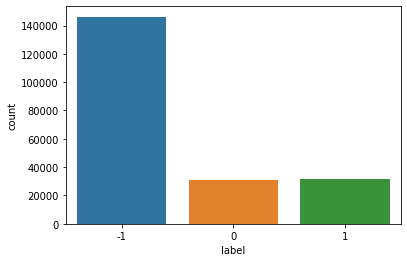

In [ ]:
# Create a flag for label masking
df_train['Random_Mask'] = True
df_train.loc[df_train.sample(frac=0.30, random_state=0).index, 'Random_Mask'] = False

# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled (masked) data
df_train['label']=df_train.apply(lambda x: x['label'] if x['Random_Mask']==False else -1, axis=1)

# Show target value distribution
print('Target Value Distribution:')
print(df_train['label'].value_counts())

sns.countplot(data=df_train,x='label')

## Genrate TFid verctors of text with 10000 features

In [ ]:
X_train=df_train['text']
y_train=df_train['label'].values

# Put test data into an array
X_test=df_test['text']
y_test=df_test['label'].values


# now get the features of all your training and test vocabulary we get the 10000 features from each vocabulary
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

No. of feature_words:  5000
(208866, 5000)
(23208, 5000)


In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
from sklearn import svm

In [ ]:
clf_ST = LogisticRegression(max_iter= 100, penalty= 'l2', solver= 'sag')
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator= clf_ST, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelLR = self_training_model.fit(X_train, y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)


clf_SGD=SGDClassifier(loss="modified_huber"
                     )
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_SGD, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelsg = self_training_model.fit(X_train, y_train)
y_pred_prob_sgd = modelsg.predict_proba(X_test)[:,1]
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_prob_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)
precision_sgd, recall_sgd, th_sgd = precision_recall_curve(y_test, y_pred_prob_sgd)


clf_KNN=KNeighborsClassifier(n_neighbors=5)
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_KNN, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelKNN = self_training_model.fit(X_train, y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)

clf_NAV=MultinomialNB()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_NAV, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=10, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelNB = self_training_model.fit(X_train, y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

# Decision Tree

clf_DT=tree.DecisionTreeClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_DT, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelTree = self_training_model.fit(X_train, y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)


clf_Rand=RandomForestClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_Rand, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=10, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelRF = self_training_model.fit(X_train, y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)



clf_SGD=SGDClassifier(loss="modified_huber"
                     )
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_SGD, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelsgd = self_training_model.fit(X_train, y_train)
y_pred_prob_sgd = modelsgd.predict_proba(X_test)[:,1]
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_prob_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)
precision_sgd, recall_sgd, th_sgd = precision_recall_curve(y_test, y_pred_prob_sgd)
clf_Ada=AdaBoostClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_Ada, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
modelada = self_training_model.fit(X_train, y_train)
y_pred_prob_ada = modelada.predict_proba(X_test)[:,1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
precision_ada, recall_ada, th_ada = precision_recall_curve(y_test, y_pred_prob_ada)



End of iteration 1, added 131523 new labels.
End of iteration 2, added 5036 new labels.
End of iteration 3, added 688 new labels.
End of iteration 4, added 183 new labels.
End of iteration 5, added 65 new labels.
End of iteration 6, added 27 new labels.
End of iteration 7, added 11 new labels.
End of iteration 8, added 8 new labels.
End of iteration 9, added 5 new labels.
End of iteration 10, added 3 new labels.
End of iteration 11, added 3 new labels.
End of iteration 1, added 125980 new labels.
End of iteration 2, added 4083 new labels.
End of iteration 3, added 976 new labels.
End of iteration 4, added 295 new labels.
End of iteration 5, added 99 new labels.
End of iteration 6, added 79 new labels.
End of iteration 7, added 53 new labels.
End of iteration 8, added 43 new labels.
End of iteration 9, added 39 new labels.
End of iteration 10, added 50 new labels.
End of iteration 11, added 82 new labels.
End of iteration 12, added 19 new labels.
End of iteration 13, added 16 new labels

In [ ]:
# Plot ROC curve
fig = plt.figure(figsize=(8,6))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression ' % roc_auc_lr)

plt.plot(fpr_sgd, tpr_sgd, label='SVM (Linear) ' % roc_auc_sgd)
plt.plot(fpr_KNN, tpr_KNN, color='pink',label='KNN ' % roc_auc_KNN)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes ' % roc_auc_nb)
plt.plot(fpr_Tree, tpr_Tree, label='Decision Tree ' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ' % roc_auc_rf)
plt.plot(fpr_sgd, tpr_sgd, label='SGD Classifier ' % roc_auc_sgd)
plt.plot(fpr_ada, tpr_ada, label='ADABoost Classifier ' % roc_auc_ada)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

In [ ]:
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
}#dic form store results of all models



In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def Evaluation(predic, test_labels):
    print("\n")#new line
    print ("Accuracy_test_set: ",accuracy_score(test_labels, predic))#accuracyof model
    print("\n")#new line
    print ("Classification_report_of_model : "+"\n", classification_report(test_labels, predic))#xlassificaion report
    print("\n")#new line
    print ("Confusion_Matrix_of model : "+"\n", confusion_matrix(test_labels, predic))#confusion metrix
    sns.heatmap(confusion_matrix(test_labels, predic),annot=True,cmap='Blues')#heatmap_confusion metrix
    auc_roc=metrics.roc_auc_score(test_labels, predic)
    print(auc_roc)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, predic)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(roc_auc)
    import matplotlib.pyplot as plt
    #plt.style.use('seaborn')
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate,color='blue',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--', color='orange')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    results = [accuracy_score(test_labels, predic), precision_score(test_labels, predic),
              recall_score(test_labels, predic),f1_score(test_labels, predic)]#store results of model
    plt.tight_layout()
    plt.show()
    return results

# Semi supervised Self Training Classifier with DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_DT=tree.DecisionTreeClassifier(
 max_features='sqrt',
 min_weight_fraction_leaf=0.0)
 #max_leaf_nodes= '10'

In [ ]:
param_grid = {#'max_features': ['sqrt','none'],
              #'ccp_alpha': [0.1, .01, .001],
              #'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini']
             }

In [ ]:
clf_grid = GridSearchCV(clf_DT, param_grid, cv=10, scoring='accuracy')
# Performing training
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_features='sqrt'),
             param_grid={'criterion': ['gini']}, scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini'}
accuracy : 0.5785479774454353


In [ ]:
#clf_DT=tree.DecisionTreeClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)




End of iteration 1, added 145944 new labels.
End of iteration 2, added 215 new labels.
End of iteration 3, added 3 new labels.
End of iteration 4, added 2 new labels.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_ST.best_params_)
print("accuracy :",clf_ST.best_score_)

---------- Semi Supervised Model - Summary ----------
Base Estimator:  GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_features='sqrt'),
             param_grid={'criterion': ['gini']}, scoring='accuracy')
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 1 1 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 1 1 1]
Number of Features:  10000
Number of Iterations:  5
Termination Condition:  no_change

---------- Semi Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.7800758359186487


Accuracy_test_set:  0.7800758359186487


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78     11611
           1       0.78      0.78      0.78     11597

    accuracy                           0.78     23208
   macro avg       0.78      0.78      0.78     23208
weighted avg       0.78      0.78      0.78     23208



Confusion_Matrix_of model : 
 [[9046 2565]
 [2539 9058]]
0.7800764317008058

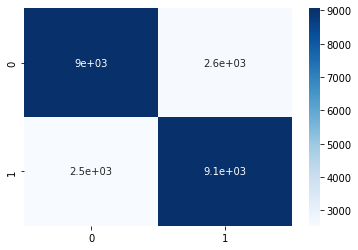

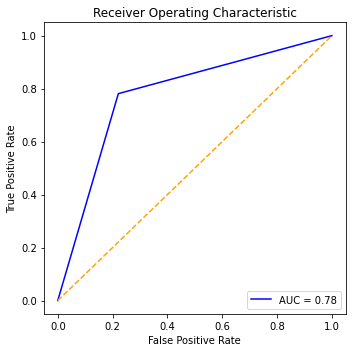

In [ ]:
print('---------- Semi Supervised Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Semi Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_DT=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["CART_ALGO"] = Evl_DT#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'CART_ALGO': [0.7800758359186487,
  0.7793168717198657,
  0.7810640682935241,
  0.7801894918173988]}

# Summary of Semi supervised Self Training Classifier with DecisionTreeClassifier and model accuracy

---------- Self Training Model - Summary ----------
Base Estimator:  GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'none']},
             verbose=True)
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 0 1 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 1 1 1]
Number of Features:  10000
Number of Iterations:  4
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.795501551189245


Accuracy_test_set:  0.795501551189245


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     11785
           1       0.79      0.80      0.79     11423

    accuracy                           0.80     23208
   macro avg       0.80      0.80      0.80     23208
weighted avg       0.80      0.80      0.80     23208



Confusion_Matri

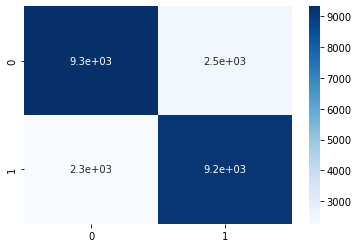

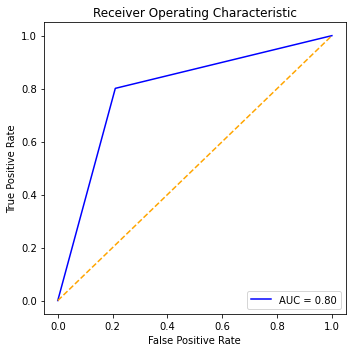

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_DT=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["CART_ALGO"] = Evl_DT#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'CART_ALGO': [0.7863236814891417,
  0.7767357825002151,
  0.7924859550561798,
  0.7845318270693028]}

In [ ]:
clf_DT=tree.DecisionTreeClassifier(max_depth=' None',
 max_features='None',
 max_leaf_nodes= '10')
#without grid


In [ ]:
clf_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
clf_DT=tree.DecisionTreeClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_DT, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)




End of iteration 1, added 146156 new labels.
End of iteration 2, added 2 new labels.
End of iteration 3, added 2 new labels.
End of iteration 4, added 2 new labels.
End of iteration 5, added 2 new labels.


In [ ]:
clf_ST.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'criterion': 'threshold',
 'k_best': 10,
 'max_iter': 100,
 'threshold': 0.7,
 'verbose': True}

---------- Self Training Model - Summary ----------
Base Estimator:  DecisionTreeClassifier()
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 1 1 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 1 1 1]
Number of Features:  10000
Number of Iterations:  6
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8442347466390899


Accuracy_test_set:  0.8442347466390899


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     11620
           1       0.84      0.85      0.84     11588

    accuracy                           0.84     23208
   macro avg       0.84      0.84      0.84     23208
weighted avg       0.84      0.84      0.84     23208



Confusion_Matrix_of model : 
 [[9795 1825]
 [1790 9798]]
0.84423652992561
0.84423652992561


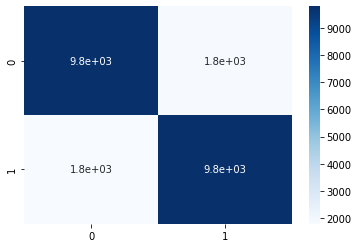

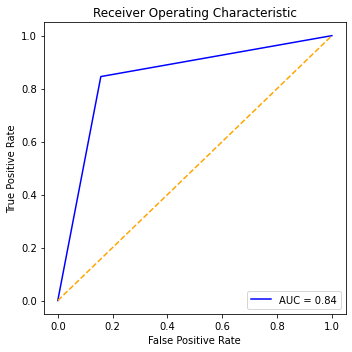

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_DT=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["CART_ALGO"] = Evl_DT#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'CART_ALGO': [0.8545760082730093,
  0.8518454787920502,
  0.8569326640124633,
  0.8543814988997713]}

# Semi supervised Self Training Classifier with LogisticRegression

In [ ]:
clf_LR=LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l2'],
    'solver' : ['lbfgs','sag'],
    'max_iter' : [100, 500]
    }
]

# Creating GridSearchCV model:
clf_grid = GridSearchCV(clf_LR, param_grid, cv=10, scoring='accuracy')

In [ ]:
clf_grid.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.686569377862918


In [ ]:
#clf_LR=LogisticRegression()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


End of iteration 1, added 131435 new labels.
End of iteration 2, added 5105 new labels.
End of iteration 3, added 750 new labels.
End of iteration 4, added 167 new labels.
End of iteration 5, added 56 new labels.
End of iteration 6, added 16 new labels.
End of iteration 7, added 8 new labels.


In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_LR=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["LR_ALGO"] = Evl_LR#get results of CART


---------- Self Training Model - Summary ----------
Base Estimator:  GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [100, 500], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'sag']}],
             scoring='accuracy')
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 0 1 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 2 2 1]
Number of Features:  1000
Number of Iterations:  13
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------


ValueError: ignored

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'NAV_ALGO': [0.8815494657014823,
  0.9597350081734491,
  0.8302322119678476,
  0.8902988946087234]}

In [ ]:
clf_LR = LogisticRegression(max_iter= 100, penalty= 'l2', solver= 'sag')
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_LR, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


---------- Self Training Model - Summary ----------
Base Estimator:  LogisticRegression()
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 0 1 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 2 1 1]
Number of Features:  10000
Number of Iterations:  12
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.92842985177525


Accuracy_test_set:  0.92842985177525


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     11928
           1       0.91      0.94      0.93     11280

    accuracy                           0.93     23208
   macro avg       0.93      0.93      0.93     23208
weighted avg       0.93      0.93      0.93     23208



Confusion_Matrix_of model : 
 [[10926  1002]
 [  659 10621]]
0.9287869950197639
0.9287869950197639


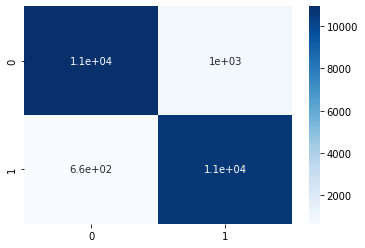

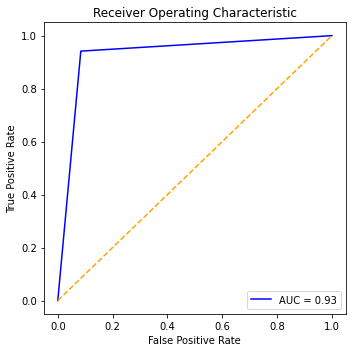

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_LR=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["LR_ALGO"] = Evl_LR#get results of CART algo

In [ ]:
clf_LR=LogisticRegression()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_LR, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


End of iteration 1, added 131436 new labels.
End of iteration 2, added 5103 new labels.
End of iteration 3, added 752 new labels.
End of iteration 4, added 172 new labels.
End of iteration 5, added 48 new labels.
End of iteration 6, added 14 new labels.
End of iteration 7, added 13 new labels.
End of iteration 8, added 5 new labels.
End of iteration 9, added 1 new labels.
End of iteration 10, added 1 new labels.
End of iteration 11, added 2 new labels.


## summary of Semi supervised Self Training Classifier with LogisticRegression and model accuracy

---------- Self Training Model - Summary ----------
Base Estimator:  LogisticRegression()
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 0 1 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 2 1 1]
Number of Features:  10000
Number of Iterations:  12
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.92842985177525


Accuracy_test_set:  0.92842985177525


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     11928
           1       0.91      0.94      0.93     11280

    accuracy                           0.93     23208
   macro avg       0.93      0.93      0.93     23208
weighted avg       0.93      0.93      0.93     23208



Confusion_Matrix_of model : 
 [[10926  1002]
 [  659 10621]]
0.9287869950197639
0.9287869950197639


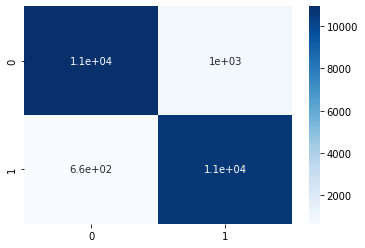

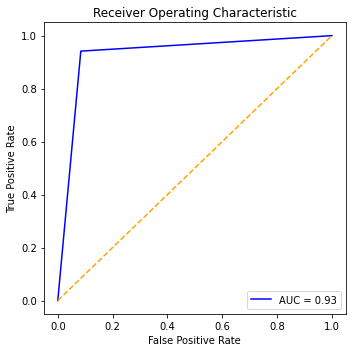

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_LR=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["LR_ALGO"] = Evl_LR#get results of CART algo

# Semi supervised Self Training Classifier with Naive bayes

In [ ]:
clf_NAV=MultinomialNB()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_NAV, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=10, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


End of iteration 1, added 118682 new labels.
End of iteration 2, added 6537 new labels.
End of iteration 3, added 1081 new labels.
End of iteration 4, added 173 new labels.
End of iteration 5, added 37 new labels.
End of iteration 6, added 6 new labels.
End of iteration 7, added 1 new labels.


# Summary of Semi supervised Self Training Classifier with Naive bayes and model Evaluation

---------- Self Training Model - Summary ----------
Base Estimator:  MultinomialNB()
Classes:  [0 1]
Transduction Labels:  [ 0  0  1 ... -1  1  0]
Iteration When Sample Was Labeled:  [ 0  1  1 ... -1  1  1]
Number of Features:  5000
Number of Iterations:  8
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8815494657014823


Accuracy_test_set:  0.8815494657014823


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      9772
           1       0.96      0.83      0.89     13436

    accuracy                           0.88     23208
   macro avg       0.88      0.89      0.88     23208
weighted avg       0.89      0.88      0.88     23208



Confusion_Matrix_of model : 
 [[ 9304   468]
 [ 2281 11155]]
0.8911701379118812
0.8911701379118812


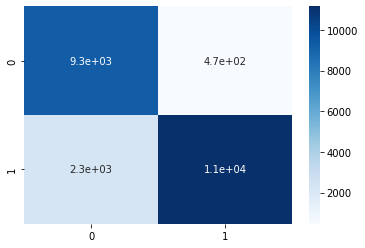

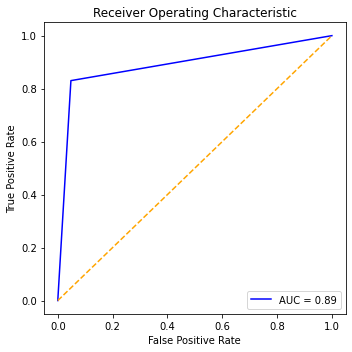

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test.todense(), y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_NAV=Evaluation(y_test, clf_ST.predict(X_test.todense()))
collect_results_of_all_model["NAV_ALGO"] = Evl_NAV#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'NAV_ALGO': [0.8815494657014823,
  0.9597350081734491,
  0.8302322119678476,
  0.8902988946087234]}

In [ ]:
clf_NB=MultinomialNB()

In [ ]:
param_grid = { 'alpha': [1.0],
      'class_prior':[ None,'n_classes'],
      'fit_prior': [True]
      }

In [ ]:
clf_grid = GridSearchCV(clf_NB, param_grid, cv= 10,scoring = "accuracy")
#clf_grid.fit(X_train.toarray(),y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)


In [ ]:
clf_NAV=MultinomialNB()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=10, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


End of iteration 1, added 122509 new labels.
End of iteration 2, added 5819 new labels.
End of iteration 3, added 747 new labels.
End of iteration 4, added 124 new labels.
End of iteration 5, added 24 new labels.
End of iteration 6, added 8 new labels.
End of iteration 7, added 1 new labels.


---------- Self Training Model - Summary ----------
Base Estimator:  GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1.0], 'class_prior': [None, 'n_classes'],
                         'fit_prior': [True]},
             scoring='accuracy')
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 1 1 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 2 1 1]
Number of Features:  10000
Number of Iterations:  8
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8939158910720442


Accuracy_test_set:  0.8939158910720442


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     10101
           1       0.96      0.85      0.90     13107

    accuracy                           0.89     23208
   macro avg       0.89      0.90      0.89     23208
weighted avg       0.90      0.89      0.89     23208



Confusion_Matrix_of

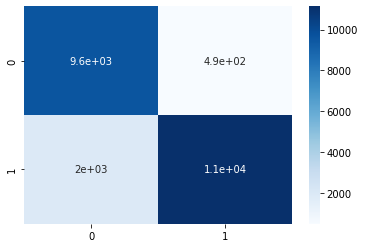

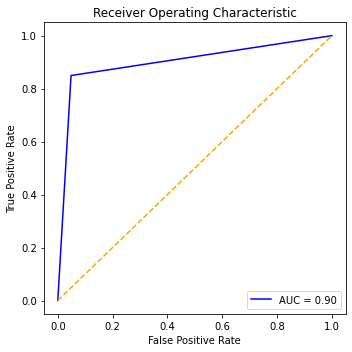

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test.todense(), y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_NAV=Evaluation(y_test, clf_ST.predict(X_test.todense()))
collect_results_of_all_model["NAV_ALGO"] = Evl_NAV#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'NAV_ALGO': [0.8939158910720442,
  0.9579282457196937,
  0.8494697489890898,
  0.9004448038819247]}

# Semi supervised Self Training Classifier with RandomForestClassifier

In [ ]:
clf_Rand=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    #'n_estimators': [200, 500],
    'max_features': ['auto'],
    #'max_depth' : [5,10],
    'criterion' :['gini']
}


In [ ]:
clf_grid = GridSearchCV(clf_Rand, param_grid, cv= 10)
clf_grid.fit(X_train,y_train)

In [ ]:
#clf_Rand=RandomForestClassifier(criterion='gini',max_features ='auto')
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=10, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

---------- Self Training Model - Summary ----------
Base Estimator:  RandomForestClassifier()
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 0 1 0]
Iteration When Sample Was Labeled:  [0 0 0 ... 0 0 0]
Number of Features:  10000
Number of Iterations:  0
Termination Condition:  all_labeled

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.9026628748707343


Accuracy_test_set:  0.9026628748707343


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     11344
           1       0.91      0.89      0.90     11864

    accuracy                           0.90     23208
   macro avg       0.90      0.90      0.90     23208
weighted avg       0.90      0.90      0.90     23208



Confusion_Matrix_of model : 
 [[10335  1009]
 [ 1250 10614]]
0.9028467733038374
0.9028467733038374


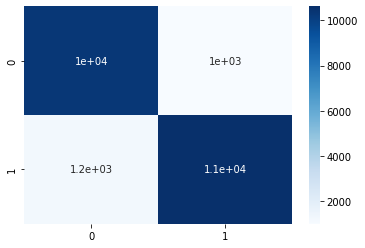

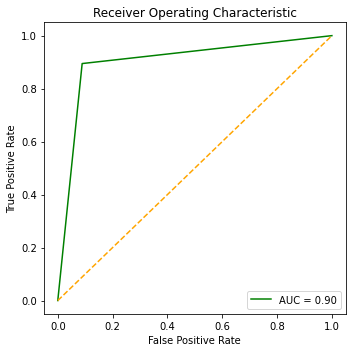

In [ ]:
#title Default title text
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_RF=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["RF_ALGO"] = Evl_RF#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'RF_ALGO': [0.9026628748707343,
  0.9131893659124151,
  0.8946392447741065,
  0.9038191339890151]}

In [ ]:
clf_Rand=RandomForestClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_Rand, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=10, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

# Summary of Semi supervised Self Training Classifier with RandomForestClassifier and model Evaluation

---------- Self Training Model - Summary ----------
Base Estimator:  RandomForestClassifier()
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 1 1 0]
Iteration When Sample Was Labeled:  [0 0 1 ... 2 0 1]
Number of Features:  50
Number of Iterations:  10
Termination Condition:  max_iter

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8203636677007928


Accuracy_test_set:  0.8203636677007928


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82     11826
           1       0.81      0.83      0.82     11382

    accuracy                           0.82     23208
   macro avg       0.82      0.82      0.82     23208
weighted avg       0.82      0.82      0.82     23208



Confusion_Matrix_of model : 
 [[9621 2205]
 [1964 9418]]


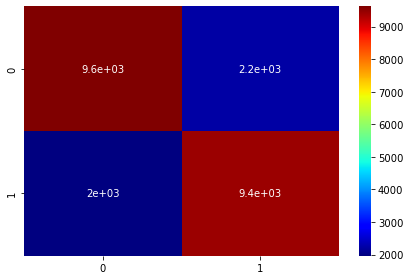

In [ ]:
#@title Default title text
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_RF=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["RF_ALGO"] = Evl_RF#get results of CART algo

# Semi supervised Self Training Classifier with KNeighborsClassifier

In [ ]:
KNN=KNeighborsClassifier(leaf_size=30,metric= 'minkowski',algorithm='auto')

In [ ]:
params = {'n_neighbors':[10]
         #'leaf_size':list(range(30,50))
         }

In [ ]:
clf_grid = GridSearchCV(KNN, params, cv = 10,scoring = "accuracy")
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10]}, scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 10}
accuracy : 0.6848218436592599


In [ ]:

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

NameError: ignored

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

In [ ]:
clf_KNN=KNeighborsClassifier()

In [ ]:
clf_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_KNN, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

End of iteration 1, added 125515 new labels.
End of iteration 2, added 13685 new labels.
End of iteration 3, added 1395 new labels.
End of iteration 4, added 468 new labels.
End of iteration 5, added 194 new labels.
End of iteration 6, added 102 new labels.
End of iteration 7, added 72 new labels.
End of iteration 8, added 36 new labels.
End of iteration 9, added 39 new labels.
End of iteration 10, added 33 new labels.
End of iteration 11, added 25 new labels.
End of iteration 12, added 23 new labels.
End of iteration 13, added 43 new labels.
End of iteration 14, added 20 new labels.
End of iteration 15, added 22 new labels.
End of iteration 16, added 22 new labels.
End of iteration 17, added 14 new labels.
End of iteration 18, added 12 new labels.
End of iteration 19, added 10 new labels.
End of iteration 20, added 10 new labels.
End of iteration 21, added 17 new labels.
End of iteration 22, added 9 new labels.
End of iteration 23, added 14 new labels.
End of iteration 24, added 10 ne

---------- Self Training Model - Summary ----------
Base Estimator:  KNeighborsClassifier()
Classes:  [0 1]
Transduction Labels:  [0 0 0 ... 0 0 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 1 1 1]
Number of Features:  1000
Number of Iterations:  49
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.5427869700103413


Accuracy_test_set:  0.5427869700103413


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.97      0.52      0.68     21574
           1       0.11      0.81      0.20      1634

    accuracy                           0.54     23208
   macro avg       0.54      0.67      0.44     23208
weighted avg       0.91      0.54      0.65     23208



Confusion_Matrix_of model : 
 [[11274 10300]
 [  311  1323]]
0.6661214953536142
0.6661214953536142


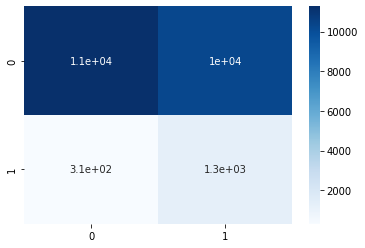

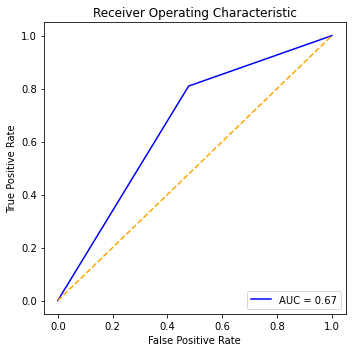

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'SGD_ALGO': [0.9295932437090658,
  0.9139636926783102,
  0.9436794883183797,
  0.928583916083916],
 'ADA_ALGO': [0.8792226818338504,
  0.8379075970059365,
  0.9137736911240383,
  0.8741977469592926],
 'KNN_ALGO': [0.5427869700103413,
  0.11382603458659554,
  0.8096695226438189,
  0.19959266802443992]}

In [ ]:
clf_KNN=KNeighborsClassifier(n_neighbors=5)
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_KNN, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

End of iteration 1, added 116305 new labels.
End of iteration 2, added 29432 new labels.
End of iteration 3, added 142 new labels.
End of iteration 4, added 40 new labels.
End of iteration 5, added 11 new labels.
End of iteration 6, added 2 new labels.
End of iteration 7, added 1 new labels.


---------- Self Training Model - Summary ----------
Base Estimator:  KNeighborsClassifier(n_neighbors=20)
Classes:  [0 1]
Transduction Labels:  [0 0 0 ... 0 0 0]
Iteration When Sample Was Labeled:  [0 1 2 ... 2 2 1]
Number of Features:  10000
Number of Iterations:  8
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.5006032402619787


Accuracy_test_set:  0.5006032402619787


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67     23155
           1       0.00      0.81      0.01        53

    accuracy                           0.50     23208
   macro avg       0.50      0.66      0.34     23208
weighted avg       1.00      0.50      0.66     23208



Confusion_Matrix_of model : 
 [[11575 11580]
 [   10    43]]
0.6556063933377607
0.6556063933377607


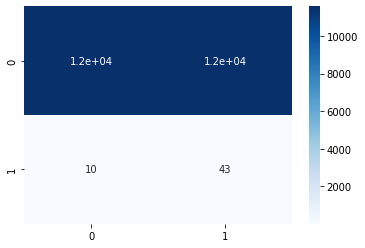

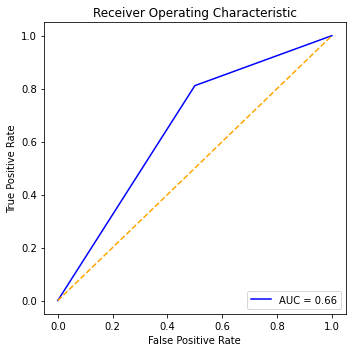

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

In [ ]:
clf_KNN=KNeighborsClassifier(n_neighbors=10,leaf_size=30,metric= 'minkowski',algorithm='auto')
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_KNN, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

End of iteration 1, added 126308 new labels.
End of iteration 2, added 13446 new labels.
End of iteration 3, added 1807 new labels.
End of iteration 4, added 253 new labels.
End of iteration 5, added 149 new labels.
End of iteration 6, added 49 new labels.
End of iteration 7, added 26 new labels.
End of iteration 8, added 26 new labels.
End of iteration 9, added 54 new labels.
End of iteration 10, added 67 new labels.
End of iteration 11, added 24 new labels.
End of iteration 12, added 7 new labels.
End of iteration 13, added 6 new labels.
End of iteration 14, added 5 new labels.
End of iteration 15, added 12 new labels.
End of iteration 16, added 3 new labels.
End of iteration 17, added 6 new labels.
End of iteration 18, added 6 new labels.
End of iteration 19, added 1 new labels.
End of iteration 20, added 1 new labels.
End of iteration 21, added 1 new labels.
End of iteration 22, added 6 new labels.
End of iteration 23, added 3 new labels.
End of iteration 24, added 2 new labels.
En

# Summary of Semi supervised Self Training Classifier with KNeighborsClassifier and model Evaluation

---------- Self Training Model - Summary ----------
Base Estimator:  KNeighborsClassifier(n_neighbors=10)
Classes:  [0 1]
Transduction Labels:  [0 0 0 ... 0 0 0]
Iteration When Sample Was Labeled:  [0 1 1 ... 1 1 1]
Number of Features:  1000
Number of Iterations:  34
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.53205791106515


Accuracy_test_set:  0.53205791106515


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     22119
           1       0.08      0.85      0.15      1089

    accuracy                           0.53     23208
   macro avg       0.53      0.68      0.41     23208
weighted avg       0.94      0.53      0.65     23208



Confusion_Matrix_of model : 
 [[11422 10697]
 [  163   926]]
0.6833550104699138
0.6833550104699138


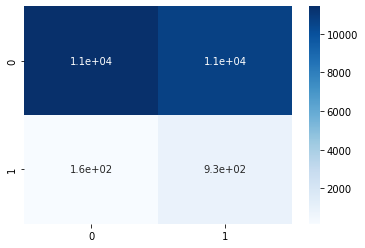

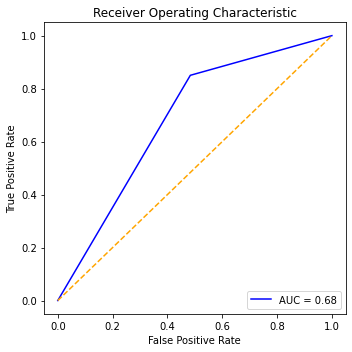

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'KNN_ALGO': [0.53205791106515,
  0.0796696205798847,
  0.8503213957759412,
  0.14568911264946505]}

# Semi supervised Self Training Classifier with SGDClassifier

In [ ]:
#sgd with grid
clf_sgd=SGDClassifier()
param_grid = [{'alpha': [0.0001, 0.1, 1.0],
               'loss': ['modified_huber'],
               'penalty': ['l2']}]

In [ ]:
clf_grid = GridSearchCV(clf_sgd, param_grid, cv= 10,
                   scoring='accuracy')
# Fit the data to the pipeline with gridsearch
#clf_grid.fit(X_train, y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.1, 'loss': 'modified_huber', 'penalty': 'l2'}
accuracy : 0.6999990425124517


In [ ]:
clf_SGD=SGDClassifier(loss="modified_huber"
                     )
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

End of iteration 1, added 126092 new labels.
End of iteration 2, added 3952 new labels.
End of iteration 3, added 819 new labels.
End of iteration 4, added 338 new labels.
End of iteration 5, added 94 new labels.
End of iteration 6, added 57 new labels.
End of iteration 7, added 68 new labels.
End of iteration 8, added 24 new labels.
End of iteration 9, added 88 new labels.
End of iteration 10, added 17 new labels.
End of iteration 11, added 8 new labels.
End of iteration 12, added 11 new labels.
End of iteration 13, added 49 new labels.
End of iteration 14, added 99 new labels.
End of iteration 15, added 21 new labels.
End of iteration 16, added 5 new labels.
End of iteration 17, added 1 new labels.
End of iteration 18, added 15 new labels.
End of iteration 19, added 18 new labels.
End of iteration 20, added 4 new labels.
End of iteration 21, added 5 new labels.
End of iteration 22, added 1 new labels.
End of iteration 23, added 6 new labels.
End of iteration 24, added 1 new labels.
E

---------- Self Training Model - Summary ----------
Base Estimator:  GridSearchCV(cv=10, estimator=SGDClassifier(),
             param_grid=[{'alpha': [0.0001, 0.1, 1.0],
                          'loss': ['modified_huber'], 'penalty': ['l2']}],
             scoring='accuracy')
Classes:  [0 1]
Transduction Labels:  [ 0  0  1 ... -1  1  0]
Iteration When Sample Was Labeled:  [ 0  1  1 ... -1  2  1]
Number of Features:  10000
Number of Iterations:  36
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.9296363322992072


Accuracy_test_set:  0.9296363322992072


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     11928
           1       0.91      0.94      0.93     11280

    accuracy                           0.93     23208
   macro avg       0.93      0.93      0.93     23208
weighted avg       0.93      0.93      0.93     23208





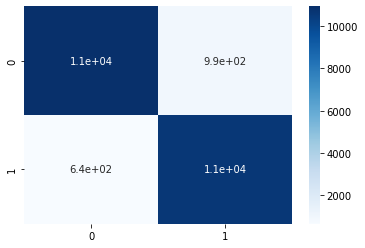

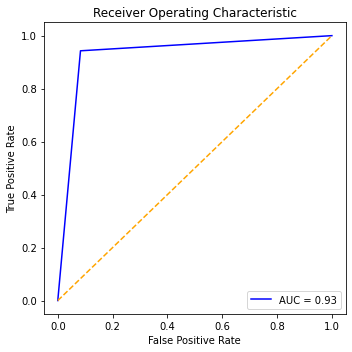

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_SGD=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["SGD_ALGO"] = Evl_SGD#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'SGD_ALGO': [0.9296794208893485,
  0.915684418824744,
  0.9422753430721558,
  0.9287895976961339]}

In [ ]:
clf_SGD=SGDClassifier(loss="modified_huber"
                     )
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_SGD, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

End of iteration 1, added 125973 new labels.
End of iteration 2, added 4038 new labels.
End of iteration 3, added 906 new labels.
End of iteration 4, added 244 new labels.
End of iteration 5, added 171 new labels.
End of iteration 6, added 67 new labels.
End of iteration 7, added 57 new labels.
End of iteration 8, added 30 new labels.
End of iteration 9, added 22 new labels.
End of iteration 10, added 29 new labels.
End of iteration 11, added 13 new labels.
End of iteration 12, added 21 new labels.
End of iteration 13, added 8 new labels.
End of iteration 14, added 9 new labels.
End of iteration 15, added 26 new labels.
End of iteration 16, added 5 new labels.
End of iteration 17, added 37 new labels.
End of iteration 18, added 15 new labels.
End of iteration 19, added 14 new labels.
End of iteration 20, added 2 new labels.
End of iteration 21, added 3 new labels.
End of iteration 22, added 2 new labels.
End of iteration 23, added 1 new labels.
End of iteration 24, added 2 new labels.


# Summary of Semi supervised Self Training Classifier with SGDClassifier and model Evaluation

---------- Self Training Model - Summary ----------
Base Estimator:  SGDClassifier(loss='modified_huber')
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 0 1 0]
Iteration When Sample Was Labeled:  [ 0  1  1 ... 19  2  1]
Number of Features:  10000
Number of Iterations:  34
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.9295932437090658


Accuracy_test_set:  0.9295932437090658


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11951
           1       0.91      0.94      0.93     11257

    accuracy                           0.93     23208
   macro avg       0.93      0.93      0.93     23208
weighted avg       0.93      0.93      0.93     23208



Confusion_Matrix_of model : 
 [[10951  1000]
 [  634 10623]]
0.930002241021377
0.930002241021377


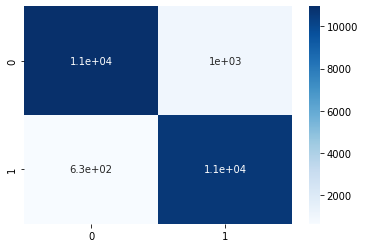

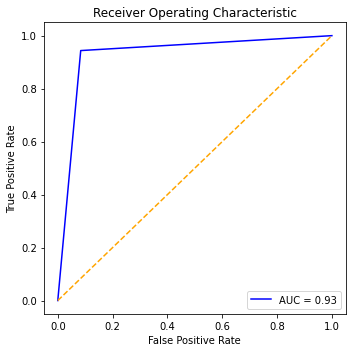

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_SGD=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["SGD_ALGO"] = Evl_SGD#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'SGD_ALGO': [0.9295932437090658,
  0.9139636926783102,
  0.9436794883183797,
  0.928583916083916]}

# Semi supervised Self Training Classifier with AdaBoostClassifier

In [ ]:
clf_Ada=AdaBoostClassifier()

In [ ]:
param_grid = [{'algorithm': ['SAMME.R'],
              'base_estimator':[None],
              'learning_rate': [1.0]}
              ]

In [ ]:
clf_grid = GridSearchCV(clf_Ada, param_grid, cv= 10,
                   scoring='accuracy')
# Fit the data to the pipeline with gridsearch
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME.R'], 'base_estimator': [None],
                          'learning_rate': [1.0]}],
             scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0}
accuracy : 0.6394099424415884


In [ ]:
#clf_Ada=AdaBoostClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

---------- Self Training Model - Summary ----------
Base Estimator:  GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME.R'], 'base_estimator': [None],
                          'learning_rate': [1.0]}],
             scoring='accuracy')
Classes:  [0 1]
Transduction Labels:  [ 0 -1 -1 ... -1 -1 -1]
Iteration When Sample Was Labeled:  [ 0 -1 -1 ... -1 -1 -1]
Number of Features:  10000
Number of Iterations:  1
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8792226818338504


Accuracy_test_set:  0.8792226818338504


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     12550
           1       0.84      0.91      0.87     10658

    accuracy                           0.88     23208
   macro avg       0.88      0.88      0.88     23208
weighted avg       0.88      0.88      0.88     23208

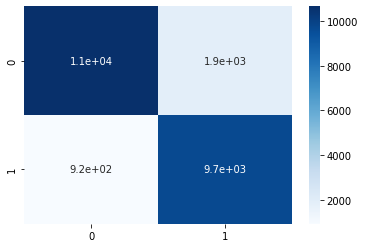

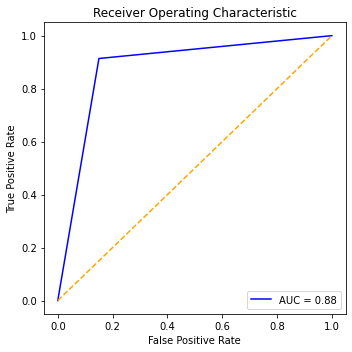

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)
#
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_ADA=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["ADA_ALGO"] = Evl_ADA#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'ADA_ALGO': [0.8792226818338504,
  0.8379075970059365,
  0.9137736911240383,
  0.8741977469592926]}

In [ ]:
clf_Ada=AdaBoostClassifier()

In [ ]:
clf_Ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
clf_Ada=AdaBoostClassifier()
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_Ada, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

---------- Self Training Model - Summary ----------
Base Estimator:  AdaBoostClassifier()
Classes:  [0 1]
Transduction Labels:  [ 0 -1 -1 ... -1 -1 -1]
Iteration When Sample Was Labeled:  [ 0 -1 -1 ... -1 -1 -1]
Number of Features:  10000
Number of Iterations:  1
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8792226818338504


Accuracy_test_set:  0.8792226818338504


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     12550
           1       0.84      0.91      0.87     10658

    accuracy                           0.88     23208
   macro avg       0.88      0.88      0.88     23208
weighted avg       0.88      0.88      0.88     23208



Confusion_Matrix_of model : 
 [[10666  1884]
 [  919  9739]]
0.8818270846058439
0.8818270846058439


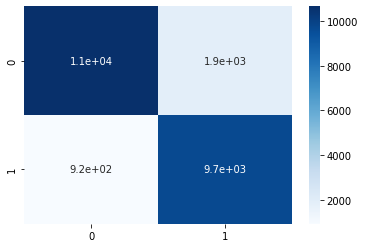

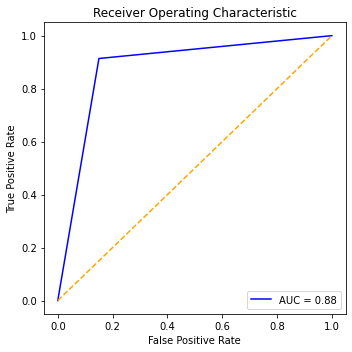

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)
#
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_ADA=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["ADA_ALGO"] = Evl_ADA#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'SGD_ALGO': [0.9295932437090658,
  0.9139636926783102,
  0.9436794883183797,
  0.928583916083916]}

# Summary of Semi supervised Self Training Classifier with AdaBoostClassifier and model Evaluation

---------- Self Training Model - Summary ----------
Base Estimator:  AdaBoostClassifier()
Classes:  [0 1]
Transduction Labels:  [ 0 -1 -1 ... -1 -1 -1]
Iteration When Sample Was Labeled:  [ 0 -1 -1 ... -1 -1 -1]
Number of Features:  10000
Number of Iterations:  1
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8792226818338504


Accuracy_test_set:  0.8792226818338504


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     12550
           1       0.84      0.91      0.87     10658

    accuracy                           0.88     23208
   macro avg       0.88      0.88      0.88     23208
weighted avg       0.88      0.88      0.88     23208



Confusion_Matrix_of model : 
 [[10666  1884]
 [  919  9739]]
0.8818270846058439
0.8818270846058439


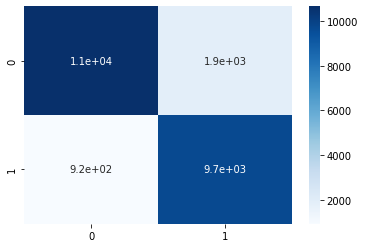

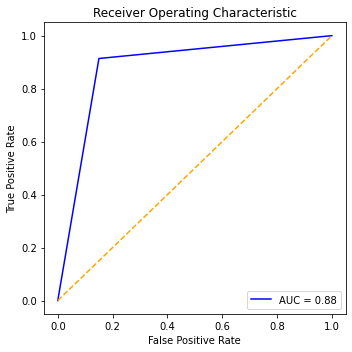

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)
#
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_ADA=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["ADA_ALGO"] = Evl_ADA#get results of CART algo

# Semi supervised Self Training Classifier with SVM

In [ ]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(penalty='l1',
                C=100, # default = 1.0
               # max_iter=500,
                dual=False
               )

In [ ]:
param_grid = {  'C': [100, 1000]
              }


In [ ]:
clf_grid = GridSearchCV(model_svc, param_grid, cv=10, scoring='accuracy')

In [ ]:
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVC(C=100, dual=False, penalty='l1'),
             param_grid={'C': [100, 1000]}, scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100}
accuracy : 0.9308025202172567


In [ ]:
# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=clf_grid, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             #verbose=True # default=False, Verbosity prints some information after each iteration
                                            )
clf_ST = self_training_model.fit(X_train, y_train)

---------- Self Training Model - Summary ----------
Base Estimator:  GridSearchCV(cv=10, estimator=LinearSVC(C=100, dual=False, penalty='l1'),
             param_grid={'C': [100, 1000]}, scoring='accuracy')
Classes:  [0 1]
Transduction Labels:  [0 0 1 ... 0 1 0]
Iteration When Sample Was Labeled:  [0 0 0 ... 0 0 0]
Number of Features:  10000
Number of Iterations:  0
Termination Condition:  all_labeled

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.9308859014133057


Accuracy_test_set:  0.9308859014133057


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     11769
           1       0.92      0.94      0.93     11439

    accuracy                           0.93     23208
   macro avg       0.93      0.93      0.93     23208
weighted avg       0.93      0.93      0.93     23208



Confusion_Matrix_of model : 
 [[10875   894]
 [  710 10729]]
0.930984681805408
0.93

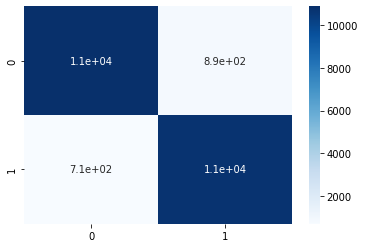

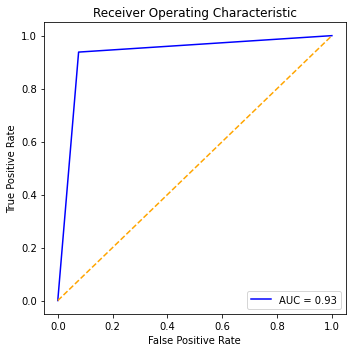

In [ ]:
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Iteration When Sample Was Labeled: ', clf_ST.labeled_iter_)
print('Number of Features: ', clf_ST.n_features_in_)
# print('Feature Names: ', clf_ST.feature_names_in_)

print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_RF=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["SVM_ALGO"] = Evl_RF#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'SVM_ALGO': [0.9308859014133057,
  0.9230835412544094,
  0.9379316373808899,
  0.9304483566039372]}

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'RF_ALGO': [0.8203636677007928,
  0.8102899423556741,
  0.8274468458970304,
  0.8187785264073028],
 'KNN_ALGO': [0.7838245432609445,
  0.7140153144627033,
  0.830564451561249,
  0.7678926671293083],
 'ADA_ALGO': [0.822992071699414,
  0.7808655252516562,
  0.8532480962677447,
  0.8154537286612759],
 'CART_ALGO': [0.7661151327128576,
  0.7294158134732858,
  0.7878449958182325,
  0.757505360972123],
 'LR_ALGO': [0.8205360220613581,
  0.8114084143508561,
  0.8269905296387232,
  0.8191253745602988],
 'NAV_ALGO': [0.5904860392967942,
  0.978921104706186,
  0.5513398265251732,
  0.7053936763794172],
 'SGD_ALGO': [0.8200620475698035,
  0.8089993977458487,
  0.8278017431111894,
  0.8182925767992342]}

In [ ]:

metrics_data_frame = pd.DataFrame(collect_results_of_all_model)#create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics')#set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql'))#convert results in to table

+-----------+-----------+------------+------------+-------------+-----------+------------+------------+
| Metrics   |   RF_ALGO |   KNN_ALGO |   ADA_ALGO |   CART_ALGO |   LR_ALGO |   NAV_ALGO |   SGD_ALGO |
|-----------+-----------+------------+------------+-------------+-----------+------------+------------|
| accuracy  |  0.820364 |   0.783825 |   0.822992 |    0.766115 |  0.820536 |   0.590486 |   0.820062 |
| precision |  0.81029  |   0.714015 |   0.780866 |    0.729416 |  0.811408 |   0.978921 |   0.808999 |
| recall    |  0.827447 |   0.830564 |   0.853248 |    0.787845 |  0.826991 |   0.55134  |   0.827802 |
| f1-score  |  0.818779 |   0.767893 |   0.815454 |    0.757505 |  0.819125 |   0.705394 |   0.818293 |
+-----------+-----------+------------+------------+-------------+-----------+------------+------------+


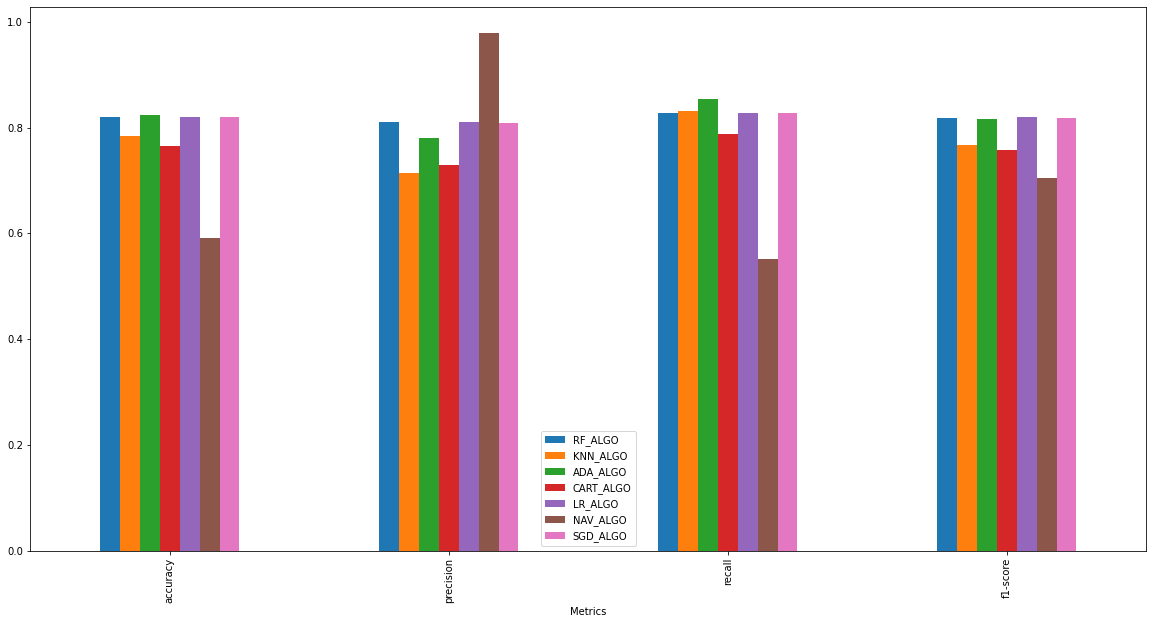

In [ ]:
metrics_data_frame.plot(kind='bar', figsize=(20,10))#sho comparison base of mertics
plt.show()

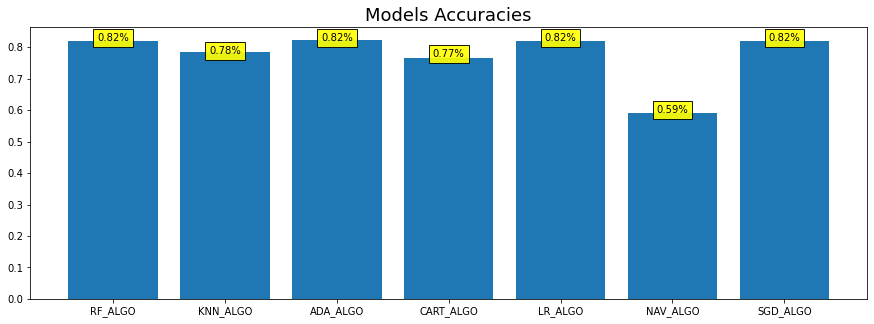

In [ ]:
models_accuracy = metrics_data_frame.iloc[0].tolist()#accuracy
models_names = metrics_data_frame.columns.tolist()#name of model
plt.figure(figsize=(15,5))
plt.bar(models_names,models_accuracy)#bar plot
plt.title("Models Accuracies", fontsize=18)#title

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_accuracy)#adding labels
plt.show()